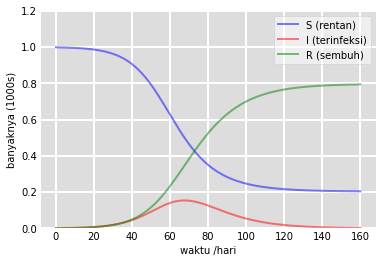

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Populasi total
N = 1000

#Nilai awal individu yang terinfeksi dan yang pulih 
I0, R0 = 1, 0

#yang lain adalah S0 yaitu yang rentan terinfeksi
S0 = N - I0 - R0
#Laju kontak, betadan laju rata-rata sembuh (gamma ),dalam 1/hari
beta, gamma = 0.2, 1./10 
# Grid hari (dalam hari)
t = np.linspace(0, 160, 160)
# Model persamaan diferensial SIR
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# vektor nilai awal
y0 = S0, I0, R0
# cari solusi dengan integral terhadap waktu
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
  
# Plot data  S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='S (rentan)')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='I (terinfeksi)')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='R (sembuh)')
ax.set_xlabel('waktu /hari')
ax.set_ylabel('banyaknya (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
